In [2]:
import torchaudio
import allin1
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
from pydub import AudioSegment
import numpy as np

In [4]:
# You can analyze a single file:
result = allin1.analyze('.//assets//empty Brain.mp3')

# Or multiple files:
#results = allin1.analyze(['your_audio_file1.wav', 'your_audio_file2.mp3'])

=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.


Downloading: "https://dl.fbaipublicfiles.com/demucs/hybrid_transformer/955717e8-8726e21a.th" to /Users/jacksnell/.cache/torch/hub/checkpoints/955717e8-8726e21a.th
100%|██████████| 80.2M/80.2M [00:02<00:00, 31.4MB/s]


Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /Users/jacksnell/Development/audiocraft/demix/htdemucs
Separating track /Users/jacksnell/Development/audiocraft/assets/empty Brain.mp3


100%|██████████████████████████████████████████████████████████████████████| 274.95/274.95 [02:59<00:00,  1.53seconds/s]


=> Found 0 spectrograms already extracted, 1 to extract.


Analyzing empty Brain.mp3:   0%|          | 0/1 [00:00<?, ?it/s]| 2024-08-19 23:15:54,652 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten1dqkrpb`, which is deprecated in favor of `natten.functional.na1d_qk`. Please consider switching, as this op will be removed soon.
| 2024-08-19 23:15:54,776 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten1dav`, which is deprecated in favor of `natten.functional.na1d_av`. Please consider switching, as this op will be removed soon.
| 2024-08-19 23:15:54,852 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten1dqkrpb`, which is deprecated in favor of `natten.functional.na1d_qk`. Please consider switching, as this op will be removed soon.
| 2024-08-19 23:15:55,035 | [[ natten.functional ]] [ WARNING ]: You're calling NATTEN op `natten.functional.natten1dav`, which is deprecated in favor of `natten.functional.na1d_av`. Please consider sw

In [7]:
from pprint import pprint
pprint(result)

AnalysisResult(path=PosixPath('/Users/jacksnell/Development/audiocraft/assets/empty Brain.mp3'), bpm=130, beats=[13.89, 14.35, 14.83, 15.28, 15.73, 16.2, 16.67, 17.12, 17.59, 18.05, 18.5, 18.97, 19.43, 19.89, 20.35, 20.81, 21.27, 21.74, 22.2, 22.67, 23.13, 23.59, 24.05, 24.52, 24.97, 25.43, 25.89, 26.36, 26.82, 27.29, 27.74, 28.21, 28.66, 29.12, 29.59, 30.05, 30.51, 30.95, 31.43, 31.89, 32.36, 32.82, 33.28, 33.75, 34.21, 34.68, 35.13, 35.59, 36.05, 36.51, 36.97, 37.45, 37.9, 38.35, 38.82, 39.29, 39.75, 40.21, 40.67, 41.13, 41.59, 42.07, 42.53, 42.98, 43.44, 43.9, 44.36, 44.83, 45.3, 45.76, 46.21, 46.68, 47.13, 47.59, 48.06, 48.51, 48.98, 49.44, 49.91, 50.37, 50.83, 51.29, 51.75, 52.21, 52.67, 53.13, 53.59, 54.06, 54.52, 54.98, 55.44, 55.91, 56.36, 56.82, 57.28, 57.74, 58.19, 58.67, 59.12, 59.58, 60.05, 60.5, 60.97, 61.43, 61.9, 62.36, 62.82, 63.27, 63.75, 64.2, 64.66, 65.12, 65.59, 66.05, 66.5, 66.96, 67.44, 67.89, 68.36, 68.81, 69.29, 69.74, 70.2, 70.66, 71.13, 71.58, 72.05, 72.51, 72

Visualizing results: 100%|██████████| 1/1 [00:11<00:00, 12.00s/it]
/var/folders/49/kqfp7t2x53q5bbcnjjf6z17w0000gn/T/ipykernel_6778/1759737820.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


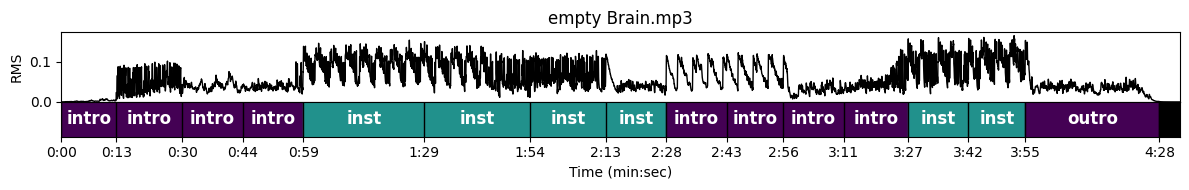

In [8]:
fig = allin1.visualize(result)
fig.show()

# Generate Audio from sample

In [3]:
# Load the pretrained model
model = MusicGen.get_pretrained('facebook/musicgen-melody')
model.set_generation_params(duration=8)  # generate 8 seconds.

# Generate unconditional audio samples
wav_unconditional = model.generate_unconditional(4)  # generates 4 unconditional audio samples

# Generate audio samples based on descriptions
descriptions = ['breakcore', 'IDM', 'hyperpop']
wav_descriptions = model.generate(descriptions)  # generates 3 samples.

# Load melody and generate audio samples with chroma
melody, sr = torchaudio.load('.//assets//trimmed_audiofile.mp3')
wav_chroma = model.generate_with_chroma(descriptions, melody[None].expand(3, -1, -1), sr)

e:\dev\audiocraft\.venv\lib\site-packages\torch\nn\utils\weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


# Stitch audio segments

In [4]:
# Function to convert tensor to AudioSegment
def tensor_to_audiosegment(tensor, sample_rate):
    audio_array = tensor.cpu().numpy()
    audio_array = (audio_array * 32767).astype(np.int16)  # Convert to int16
    return AudioSegment(
        audio_array.tobytes(),
        frame_rate=sample_rate,
        sample_width=audio_array.dtype.itemsize,    
        channels=1
    )



In [5]:
# Convert generated audio tensors to AudioSegment
audio_segments = []



In [6]:

# Process chroma-based audio samples
for wav in wav_chroma:
    audio_segments.append(tensor_to_audiosegment(wav, model.sample_rate))

# Concatenate all audio segments
blended_audio = sum(audio_segments)

# Export the final blended audio
blended_audio.export("blended_output.wav", format="wav")

<_io.BufferedRandom name='blended_output.wav'>

In [7]:
# Process unconditional audio samples
for wav in wav_unconditional:
    audio_segments.append(tensor_to_audiosegment(wav, model.sample_rate))

# Process description-based audio samples
for wav in wav_descriptions:
    audio_segments.append(tensor_to_audiosegment(wav, model.sample_rate))